In [2]:
import numpy as np
import pandas as pd
import pyro
import pyro.distributions as dist


import matplotlib.pyplot as plt
import seaborn as sns


## 1. Predicting Young modulus as a linear regression problem   

Since $Y = - \frac{il}{2kl\sqrt{Bm'}}$ and having the experimental data. The first approach is to predict the Young's modulus value as a simple regression problem      

In [3]:
beam = {"length": 0.301,
        "width": 0.026,
        "thickness": 0.003,
        "E":10e10,
        "rho": 8.34e3,
        #"E": 100000186368, # approach without normalizing
        #"E": 100000194560, # normalized approach
        #"E": 10e11,
        "mass": 0.1877
       }

beam["massPerUnit"] = beam["mass"] / beam["length"]
beam["volume"] = beam["length"] * beam["width"] * beam["thickness"]
beam["I"] = (beam["width"]*beam["thickness"]**3)/12


In [4]:
beam

{'length': 0.301,
 'width': 0.026,
 'thickness': 0.003,
 'E': 100000000000.0,
 'rho': 8340.0,
 'mass': 0.1877,
 'massPerUnit': 0.6235880398671096,
 'volume': 2.3477999999999998e-05,
 'I': 5.849999999999999e-11}

In [5]:
def normalize(x):
    x = (x - x.mean()) / x.std()
    return x

def mobilityFunc(E, freq, beam, rho = 2.59*8.4e-3, eta=0.007):
 
    l = beam["length"]/2

    # calculating the bending wave number
    w = 2*np.pi*freq # Angular frequency
    B = E*beam["I"] #
    complex_B = E*(1+1j*eta)*beam["I"]
    cb = np.sqrt(w)*(B/(rho*beam["thickness"]*beam["width"]))**(1/4) # bending wave velocity
    
    kl = w/(cb)*l # bending wave number
    complex_kl = kl*(1-1j*eta/4)
    N_l = np.cos(complex_kl)*np.cosh(complex_kl) + 1
    D_l = np.cos(complex_kl)*np.sinh(complex_kl) + np.sin(complex_kl)*np.cosh(complex_kl)

    Y = -(1j*l)/ (2*complex_kl*np.sqrt(complex_B *rho*beam["thickness"]*beam["width"])) * N_l/D_l
    return Y
    #Y = -(0.25*eta+1j)*l/(2*kl*np.sqrt(B*beam["massPerUnit"])) * N_l/D_l
    # The mobility is a complex value but just the absolute value is shown 
    #Y = -1j*l/ (2*complex_kl*torch.sqrt(complex_B*beam["massPerUnit"])) d* N_l/D_l)

In [6]:
FEM

NameError: name 'FEM' is not defined

/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


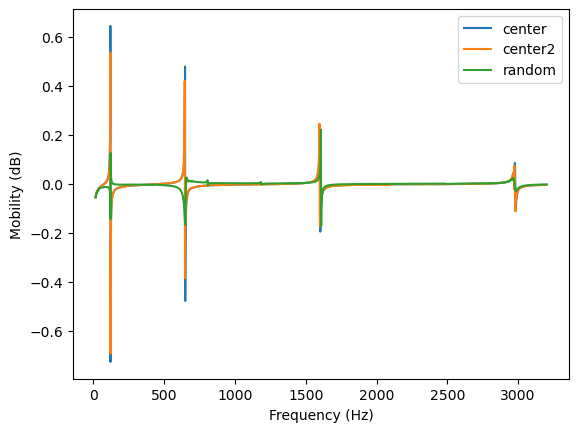

In [ ]:
FEM = pd.read_csv("../Data/bend/centerFreqResponse.csv")[30:]
FEM["mobility"] = FEM["force"] + 1j*FEM["velocity"]

FEM2 = pd.read_csv("../Data/bend/center2FreqResponse.csv")[30:]
FEM2["mobility"] = FEM2["force"] + 1j*FEM2["velocity"]

FEM3 = pd.read_csv("../Data/bend/RandomFreqResponse.csv")[30:]
FEM3["mobility"] = FEM3["force"] + 1j*FEM3["velocity"]

plt.plot(FEM["freq"], FEM["mobility"], label="center")
plt.plot(FEM2["freq"], FEM2["mobility"], label="center2")
plt.plot(FEM3["freq"], FEM3["mobility"], label="random")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Mobility (dB)")
plt.legend()

In [7]:
experiment = pd.read_csv("./Data/bend/centerFreqResponse.csv")[10:]
experiment["mobility"] = experiment["force"] + 1j*experiment["velocity"]
#plt.semilogx(data["freq"], 20*np.log10(abs(data["mobility"])), label="measurement")
norm_exp = abs(experiment["mobility"])
#norm_exp = (norm_exp - norm_exp.mean()) / norm_exp.std()


Y_theo = mobilityFunc(beam["E"], experiment["freq"], beam, rho=beam["rho"])
norm_Y = Y
#norm_Y = (norm_Y - norm_Y.mean()) / norm_Y.std()
plt.plot(experiment["freq"], 20*np.log10(norm_exp), label="measurement", linewidth=1)
#plt.plot(experiment["freq"], 20*np.log10(Y_theo), label="Analytical", linewidth=1)
#plt.plot(FEMfreq, 20*np.log10(FEMmob), label="FEM")
#plt.plot(data["freq"], 20*np.log10(Y_pred_eta), label="E+eta")
#plt.xlim([0, 1000])
plt.xlabel("frequency / Hz")
plt.ylabel("Mobility / dB")
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: './Data/bend/centerFreqResponse.csv'

In [8]:
#Finding resonances

print(experiment["freq"][20*np.log10(norm_exp) > -10])
limdown = 2800*2
limup = 3050*2
plt.plot(experiment["freq"][limdown:limup], 20*np.log10(norm_exp[limdown:limup]), label="measurement", linewidth=1)

NameError: name 'experiment' is not defined

/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


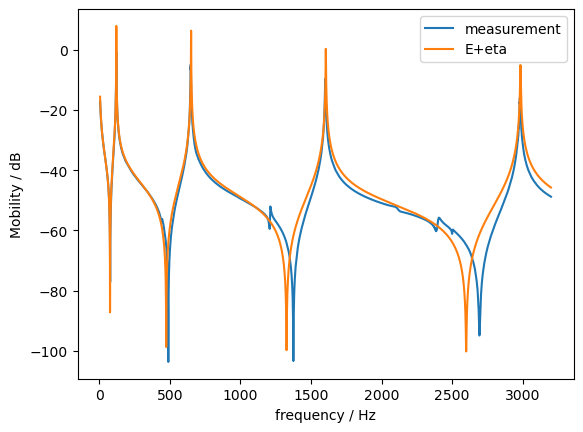

In [41]:
data = pd.read_csv("../Data/bend/centerFreqResponse.csv")[10:]
data["mobility"] = data["force"] + 1j*data["velocity"]
#plt.semilogx(data["freq"], 20*np.log10(abs(data["mobility"])), label="measurement")
norm_exp = abs(data["mobility"])
#norm_exp = (norm_exp - norm_exp.mean()) / norm_exp.std()


Y_theo = mobilityFunc(beam["E"], data["freq"], beam)
Y_pred = mobilityFunc(101018331913.550,  data["freq"], beam, rho = 8094.865, eta=0.001)
Y_pred_eta = mobilityFunc(0.993*10e10, data["freq"], beam, eta = 0.01)
Y_FEM = mobilityFunc(1*10e10, data["freq"], beam, rho=0.61*873)

#norm_Y = (norm_Y - norm_Y.mean()) / norm_Y.std()
plt.plot(data["freq"], 20*np.log10(norm_exp), label="measurement", )
#plt.semilogx(data["freq"], 20*np.log10(Y), label="E=10e10")
#plt.plot(data["freq"], 20*np.log10(Y), label="E=10e10")
#plt.plot(data["freq"], 20*np.log10(Y_FEM), label="FEM")
#plt.plot(FEMfreq, 20*np.log10(FEMmob), label="Analytical")
plt.plot(data["freq"], 20*np.log10(Y_pred), label="E+eta")
#plt.xlim([0, ·000])
plt.xlabel("frequency / Hz")
plt.ylabel("Mobility / dB")
plt.legend()

In [8]:
freq = data["freq"][::2].values
print(freq)

[   5.    6.    7. ... 3198. 3199. 3200.]


In [9]:
data = pd.read_csv("./Data/bend/centerFreqResponse.csv")[10:]
data["mobility"] = data["force"] + 1j*data["velocity"]

w = 2*np.pi*data["freq"]
B = beam["E"]*beam["I"]
cb = np.sqrt(w)*(B/beam["massPerUnit"])**(1/4)
kl_data = w/cb * (1-1j*(0.0007/4))*beam["length"]

plt.plot(kl_data, 20*np.log10(data["mobility"]))

FileNotFoundError: [Errno 2] No such file or directory: './Data/bend/centerFreqResponse.csv'

In [10]:
def mobilityFuncModel(E, freq, beam=beam, eta=0.001):
    l = beam["length"]
    
    E = E.numpy()
    print(E)
    freq = freq
    B = E*beam["I"]
    w = 2*np.pi*freq
    cb = np.sqrt(w)*(B/beam["massPerUnit"])**(1/4)
    kl = w/cb * (1-1j*(eta/4))*beam["length"]
    
    N_l = np.cos(kl)*np.cosh(kl) + 1
    D_l = np.cos(kl)*np.sinh(kl) + np.sin(kl)*np.cosh(kl)
    
    
    Y = -(1j*l/ 2*kl)*(1-1j*eta/4)*l*np.sqrt(B*(1+1j*eta)*beam["massPerUnit"]) * N_l/D_l
    return Y

In [11]:
def model(freq, Y_exp):
    E_theo = 10e10 # theoreticall Young's modulus of brass
    #alpha = pyro.sample("alpha", dist.Normal(Etheo, 1))
    #beta = pyro.sample("beta", dist.Dirichlet(10))
    E = pyro.sample("E", dist.Normal(E_theo, 1.))
    with pyro.plate("data", len(freq)):
        Y = pyro.sample("Y", dist.Normal(mobilityFuncModel(E, freq), 1.), obs=Y_exp)
    return Y
         

In [12]:
from pyro.infer import MCMC, NUTS
import torch
#y_obs = torch.tensor(np.array(data["mobility"])) # Suppose this was the vector of observed y's
#freq = torch.tensor(np.array(data["freq"])).float()
y_obs = np.array(data["mobility"]) # Suppose this was the vector of observed y's
freq = np.array(data["freq"])
# Run inference in Pyro
nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_samples=1000, warmup_steps=500, num_chains=1)
mcmc.run(freq, y_obs)

# Show summary of inference results
mcmc.summary()

Warmup:   0%|          | 0/1500 [00:00, ?it/s]

100000000000.0


ValueError: Input arguments must all be instances of numbers.Number, torch.Tensor or objects implementing __torch_function__.
Trace Shapes:       
 Param Sites:       
Sample Sites:       
       E dist      |
        value      |
    data dist      |
        value 6391 |

## Maximum A Posteriori estimation


In [13]:
import graphviz
experiment = pd.read_csv("./Data/bend/centerFreqResponse.csv")[10:]
experiment["mobility"] = experiment["force"] + 1j*experiment["velocity"]

w = 2*np.pi*experiment["freq"]
B = beam["E"]*beam["I"]
cb = np.sqrt(w)*(B/beam["massPerUnit"])**(1/4)
kl_data = w/cb * (1-1j*(0.0007/4))*beam["length"]

FileNotFoundError: [Errno 2] No such file or directory: './Data/bend/centerFreqResponse.csv'

In [14]:
def mobilityFuncModel(E, beam=beam, eta=0.001):
    l = beam["length"]
    
    E = E.numpy()
    
    freq = experiment["freq"]
    B = E*beam["I"]
    w = 2*np.pi*freq
    cb = np.sqrt(w)*(B/beam["massPerUnit"])**(1/4)
    kl = w/cb * (1-1j*(eta/4))*beam["length"]
    
    N_l = np.cos(kl)*np.cosh(kl) + 1
    D_l = np.cos(kl)*np.sinh(kl) + np.sin(kl)*np.cosh(kl)
    
    
    Y = -(1j*l/ 2*kl)*(1-1j*eta/4)*l*np.sqrt(B*(1+1j*eta)*beam["massPerUnit"]) * N_l/D_l
    return Y

In [15]:
def model(Y_exp):
    E_theo = 10e10 # theoreticall Young's modulus of brass
    # define the hyperparameters that control the Beta prior
    alpha = torch.tensor(E_theo)
    beta = torch.tensor(1.)
    f = pyro.sample("latent_fairness", dist.Normal(alpha, beta)) 
    
    with pyro.plate("data", len(Y_exp)):
        Y = pyro.sample("Y", dist.Bernoulli(mobilityFuncModel(f)), obs=data)

In [16]:
def guide(data):
    Youngs = pyro.param("youngs", torch.tensor(10e10),
                        constraint=dist.unit_interval) #Theoretical value of Young's modulus
    pyro.sample("latent_fairness", dist.Delta(Youngs))

In [17]:
data = torch.tensor(np.array(experiment["mobility"])) # Suppose this was the vector of observed y's
freq = np.array(experiment["freq"])
pyro.render_model(model, model_args=(data,), render_distributions=True)

NameError: name 'experiment' is not defined

In [18]:
# set up the optimizer
adam_params = {"lr": 0.0005, "betas": (0.90, 0.999)}
optimizer = Adam(adam_params)

# setup the inference algorithm
svi = SVI(model, guide, optimizer, loss=Trace_ELBO())

n_steps = 5000
# do gradient steps
for step in range(n_steps):
    svi.step(data)

NameError: name 'Adam' is not defined

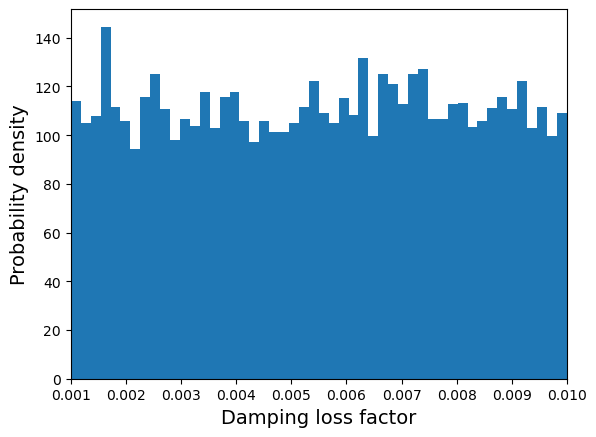

In [19]:
import numpy as np
import matplotlib.pyplot as plt

lower_limit = 0.001
upper_limit = 0.01

# Generate 10,000 random numbers from a uniform distribution with the given limits
data = np.random.uniform(lower_limit, upper_limit, 10000)

# Plot the histogram of the generated data
plt.hist(data, bins=50, density=True)

# Set the x-axis limits to the given limits
plt.xlim(lower_limit, upper_limit)

# Set the y-axis label
plt.ylabel("Probability density", fontsize=14)
plt.xlabel("Damping loss factor", fontsize=14)

# Set the plot title
# Display the plot
plt.show()

In [20]:
pd.read_csv("./Data/bend/centerFreqResponse.csv").head()

FileNotFoundError: [Errno 2] No such file or directory: './Data/bend/centerFreqResponse.csv'